# Question 1  

An article in the International Journal of Research in Marketing describes an experiment to test new ideas to increase credit card division of a financial servies compant. They want to improve the response rate to its credit card offers. They know from experience that the interest rates are an important factor in attracting potential customers, so they havedecided to focus on factors involving both interest rates and fees. They want to test changes in both introductory and long-term rates, as well as the effects of adding an account-opening fee and lower the annual fee. The factors tested in the experiment are as follows:

In [4]:
# require("conf.design")
library(dplyr)
library(daewr)
run <- 1:16
A <- rep(c(-1, 1), 8)
B <- rep(c(-1, -1, 1, 1), 4)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 2)
D <- c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1)
y <- c(2.45, 3.36, 2.16, 2.29, 2.49, 3.39, 2.32, 2.44, 
       1.84, 2.24, 1.69, 1.87, 2.29, 2.92, 2.04, 2.03)
label <- c("(1)", "a", "b", "ab", "c", "ac", "bc", "abc", "d", "ad", "bd", "abd", "cd", "acd", "bcd", "abcd")
data <- data.frame(run, A, B, C, D, y, label)
data

run,A,B,C,D,y,label
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1,-1,-1,-1,2.45,(1)
2,1,-1,-1,-1,3.36,a
3,-1,1,-1,-1,2.16,b
4,1,1,-1,-1,2.29,ab
5,-1,-1,1,-1,2.49,c
6,1,-1,1,-1,3.39,ac
7,-1,1,1,-1,2.32,bc
8,1,1,1,-1,2.44,abc
9,-1,-1,-1,1,1.84,d


where, 

| Factor | (-1) Control | (+1) New Idea |
| --- | --- | --- |
| A: Annual Fee | Current | Lower |
| B: Account-opening fee | No | Yes |
|C: Initial interest rate | Current | Lower |
|D: Long-term interest rate | Low | High |

**a)** Analyze the data and determine which factor is not significant.

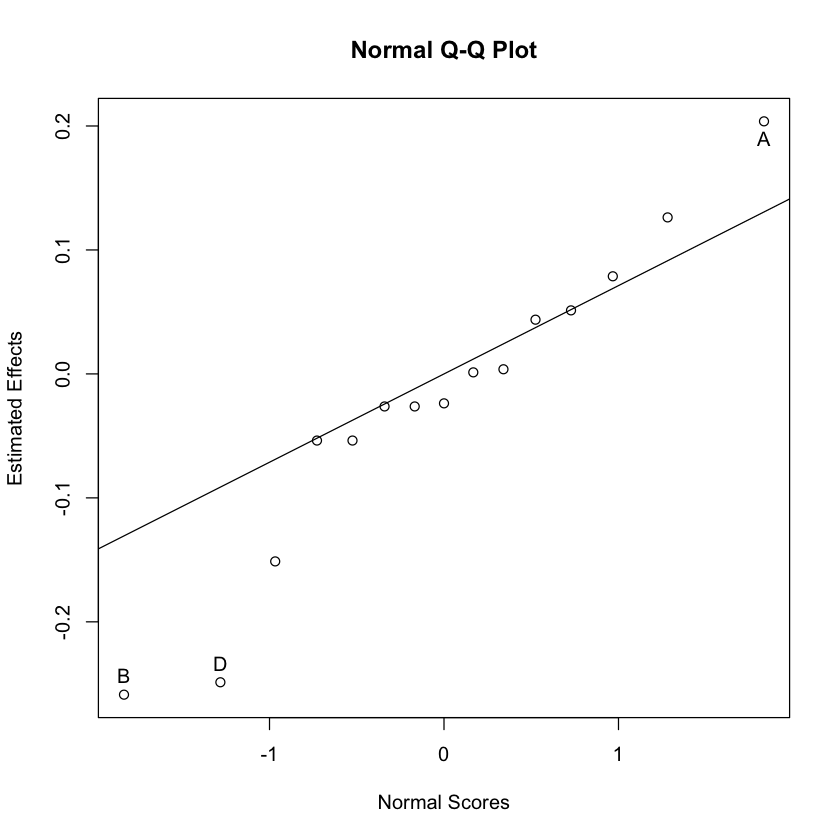

In [5]:
model <- lm(y ~ A*B*C*D, data = data)
fullnormal(coef(model)[-1], alpha = 0.05)

the factor "$C$" (Initial interset rate) is not significant.

**b)** Project the $2^4$ design into two replicates of a $2^3$ on the significant factors. The new design table should include the runs, factors, responses, and labels.

In [ ]:
# Drop C and change the labels.
edit <- subset(data, select = -c(C,run))
edit$label <- gsub("c", "", edit$label)
edit$label[5] <- "(1)"
# Define new columns.
run <- 1:8
factorials <- edit[c(1:4, 9:12), 1:3]
I <- edit$y[c(1:4, 9:12)]
II <- edit$y[c(5:8, 13:16)]
sum <- I + II
labels <- edit$label[c(1:4, 9:12)]
# Create the new projected data frame:
projection <- data.frame(run, factorials, I, II,sum, labels)
rownames(projection) <- 1:8
projection

,run,A,B,D,I,II,sum,labels
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,-1,-1,-1,2.45,2.49,4.94,(1)
2,2,1,-1,-1,3.36,3.39,6.75,a
3,3,-1,1,-1,2.16,2.32,4.48,b
4,4,1,1,-1,2.29,2.44,4.73,ab
5,5,-1,-1,1,1.84,2.29,4.13,d
6,6,1,-1,1,2.24,2.92,5.16,ad
7,7,-1,1,1,1.69,2.04,3.73,bd
8,8,1,1,1,1.87,2.03,3.90,abd


**c)** In the projected design, what is the estimated effect of the account-opening fee in the response rate? 

The estimated effect is two times the regression coefficient.

In [ ]:
# Calculate in 3 ways... 

# using the sum
model2 <- lm(sum ~ A*B*D, data = projection)
effect <- model2$coefficients
effect
# using like textbook
model3 <- lm(y ~ A*B*D, data = edit)
effects <- 2 * model3$coefficients
effects
# By hand
(3.90 + 4.73 -5.16 - 6.75 + 3.73 + 4.48 - 4.13 - 4.94) / 8

(Intercept)           A           B           D         A:B         A:D 
     4.7275      0.4075     -0.5175     -0.4975     -0.3025     -0.1075 
        B:D       A:B:D 
     0.1025      0.0875

(Intercept)           A           B           D         A:B         A:D 
     4.7275      0.4075     -0.5175     -0.4975     -0.3025     -0.1075 
        B:D       A:B:D 
     0.1025      0.0875

[1] -0.5175

From the analysis above we can conclude that the estimated effect of the account-opening fee (B) in the response rate is $-0.5175$.

**d)** Using the projected design, is the account-opening fee significant?

In [ ]:
model3.aov <- aov(model3)
summary(model3.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1 0.6642  0.6642  12.306 0.00798 **
B            1 1.0712  1.0712  19.847 0.00213 **
D            1 0.9900  0.9900  18.342 0.00268 **
A:B          1 0.3660  0.3660   6.781 0.03142 * 
A:D          1 0.0462  0.0462   0.856 0.38181   
B:D          1 0.0420  0.0420   0.779 0.40330   
A:B:D        1 0.0306  0.0306   0.567 0.47288   
Residuals    8 0.4318  0.0540                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The value $F = 19.847$ has a p-value of $0.00213 < 0.05$. Therefore we conclude there is strong evidence that the account-opening fee is significant.

**e)** Confound the projected design with blocks using the highest order interaction as a counfounding. Write down the runs for both blocks and estimate the block effect. What is the block effect really estimating in this Case?

In [ ]:
# Display the runs and their associated block
Block <- c(1,2,2,1,2,1,1,2)
ABD <- c(-1, 1, 1, -1, 1, -1, -1, 1)
display <- data.frame(run, Block)
t(display)
# Estimate the Block effect
confound <- data.frame(Block, sum)
ybar_1 <- sum(confound$sum[confound$Block == 1]) /4
ybar_2 <- sum(confound$sum[confound$Block == 2]) /4  
block_effect <- ybar_1 - ybar_2
block_effect 

run,1,2,3,4,5,6,7,8
Block,1,2,2,1,2,1,1,2


[1] -0.175

The block effect really estimates the Blocks + ABCD.

# Question 2  

An experiment was performed to improve the yield of a chemical process. Four factors were selected, an two replicates of a completely randomized experiment were run. The results are shown in the following table:

In [ ]:
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1), 2)
y <- c(
    90, 74, 81, 83, 77, 81, 88, 73,
    98, 72, 87, 85, 99, 79, 87, 80,
    93, 78, 85, 80, 78, 80, 82, 70,
    95, 76, 83, 86, 90, 75, 84, 80
)
data <- data.frame(A,B,C,D, y)
t(data)

A,-1,1,-1,1,-1,1,-1,1,-1,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
B,-1,-1,1,1,-1,-1,1,1,-1,-1,...,1,1,-1,-1,1,1,-1,-1,1,1
C,-1,-1,-1,-1,1,1,1,1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,1,1
D,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,1,1,1,1,1,1,1,1
y,90,74,81,83,77,81,88,73,98,72,...,82,70,95,76,83,86,90,75,84,80


**a)** Estimate the factor effects.

The factors effects can be caluclated as:

In [ ]:
model <- lm(y ~ A*B*C*D, data = data)
Effects <- as.matrix(2 * model$coefficients)
t(Effects)

(Intercept),A,B,C,D,A:B,A:C,B:C,A:D,B:D,C:D,A:B:C,A:B:D,A:C:D,B:C:D,A:B:C:D
165.5625,-9.0625,-1.3125,-2.6875,3.9375,4.0625,0.6875,-0.5625,-2.1875,-0.1875,1.6875,-5.1875,4.6875,-0.9375,-0.9375,2.4375


**b)** Prepare an analysis of variance table, and determine which factors are important in explaining yield.

In [ ]:
model.aov <- aov(y ~ A*B*C*D, data = data)
summary(model.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  657.0   657.0  85.816 7.87e-08 ***
B            1   13.8    13.8   1.800 0.198445    
C            1   57.8    57.8   7.547 0.014317 *  
D            1  124.0   124.0  16.200 0.000979 ***
A:B          1  132.0   132.0  17.245 0.000749 ***
A:C          1    3.8     3.8   0.494 0.492302    
B:C          1    2.5     2.5   0.331 0.573296    
A:D          1   38.3    38.3   5.000 0.039945 *  
B:D          1    0.3     0.3   0.037 0.850417    
C:D          1   22.8    22.8   2.976 0.103793    
A:B:C        1  215.3   215.3  28.118 7.15e-05 ***
A:B:D        1  175.8   175.8  22.959 0.000200 ***
A:C:D        1    7.0     7.0   0.918 0.352162    
B:C:D        1    7.0     7.0   0.918 0.352162    
A:B:C:D      1   47.5    47.5   6.208 0.024077 *  
Residuals   16  122.5     7.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$A,C,D$ are all important in explaining yield. Although $B$ isn't significant it's interactions with  
$A$, $AC$, $AD$, $ACD$ are significant, so we should keep it in the model.

**c)** Write down a regression model for predicting yield, assuming that all four factors were varied over the range from $-1$ to $+1$ (in coded units).

In [ ]:
summary(model)


Call:
lm(formula = y ~ A * B * C * D, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
  -4.5   -1.5    0.0    1.5    4.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.78125    0.48914 169.238  < 2e-16 ***
A           -4.53125    0.48914  -9.264 7.87e-08 ***
B           -0.65625    0.48914  -1.342 0.198445    
C           -1.34375    0.48914  -2.747 0.014317 *  
D            1.96875    0.48914   4.025 0.000979 ***
A:B          2.03125    0.48914   4.153 0.000749 ***
A:C          0.34375    0.48914   0.703 0.492302    
B:C         -0.28125    0.48914  -0.575 0.573296    
A:D         -1.09375    0.48914  -2.236 0.039945 *  
B:D         -0.09375    0.48914  -0.192 0.850417    
C:D          0.84375    0.48914   1.725 0.103793    
A:B:C       -2.59375    0.48914  -5.303 7.15e-05 ***
A:B:D        2.34375    0.48914   4.792 0.000200 ***
A:C:D       -0.46875    0.48914  -0.958 0.352162    
B:C:D       -0.46875    0.48914  -0.958 0.352162    
A

The model is...  

$$
\begin{align}
Y = 82.78A - 0.66B - 1.34C + 1.97D \\
+ 2.03AB + 0.34AC -0.28 BC   \\
- 1.09AD - 0.09BD +  0.84CD  \\
-2.59ABC + 2.34ABD -0.47ACD \\
-0.47BCD + 1.22ABCD
\end{align}
$$


**d)** Does the residual analysis appear satisfactory?


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.96135, p-value = 0.2989


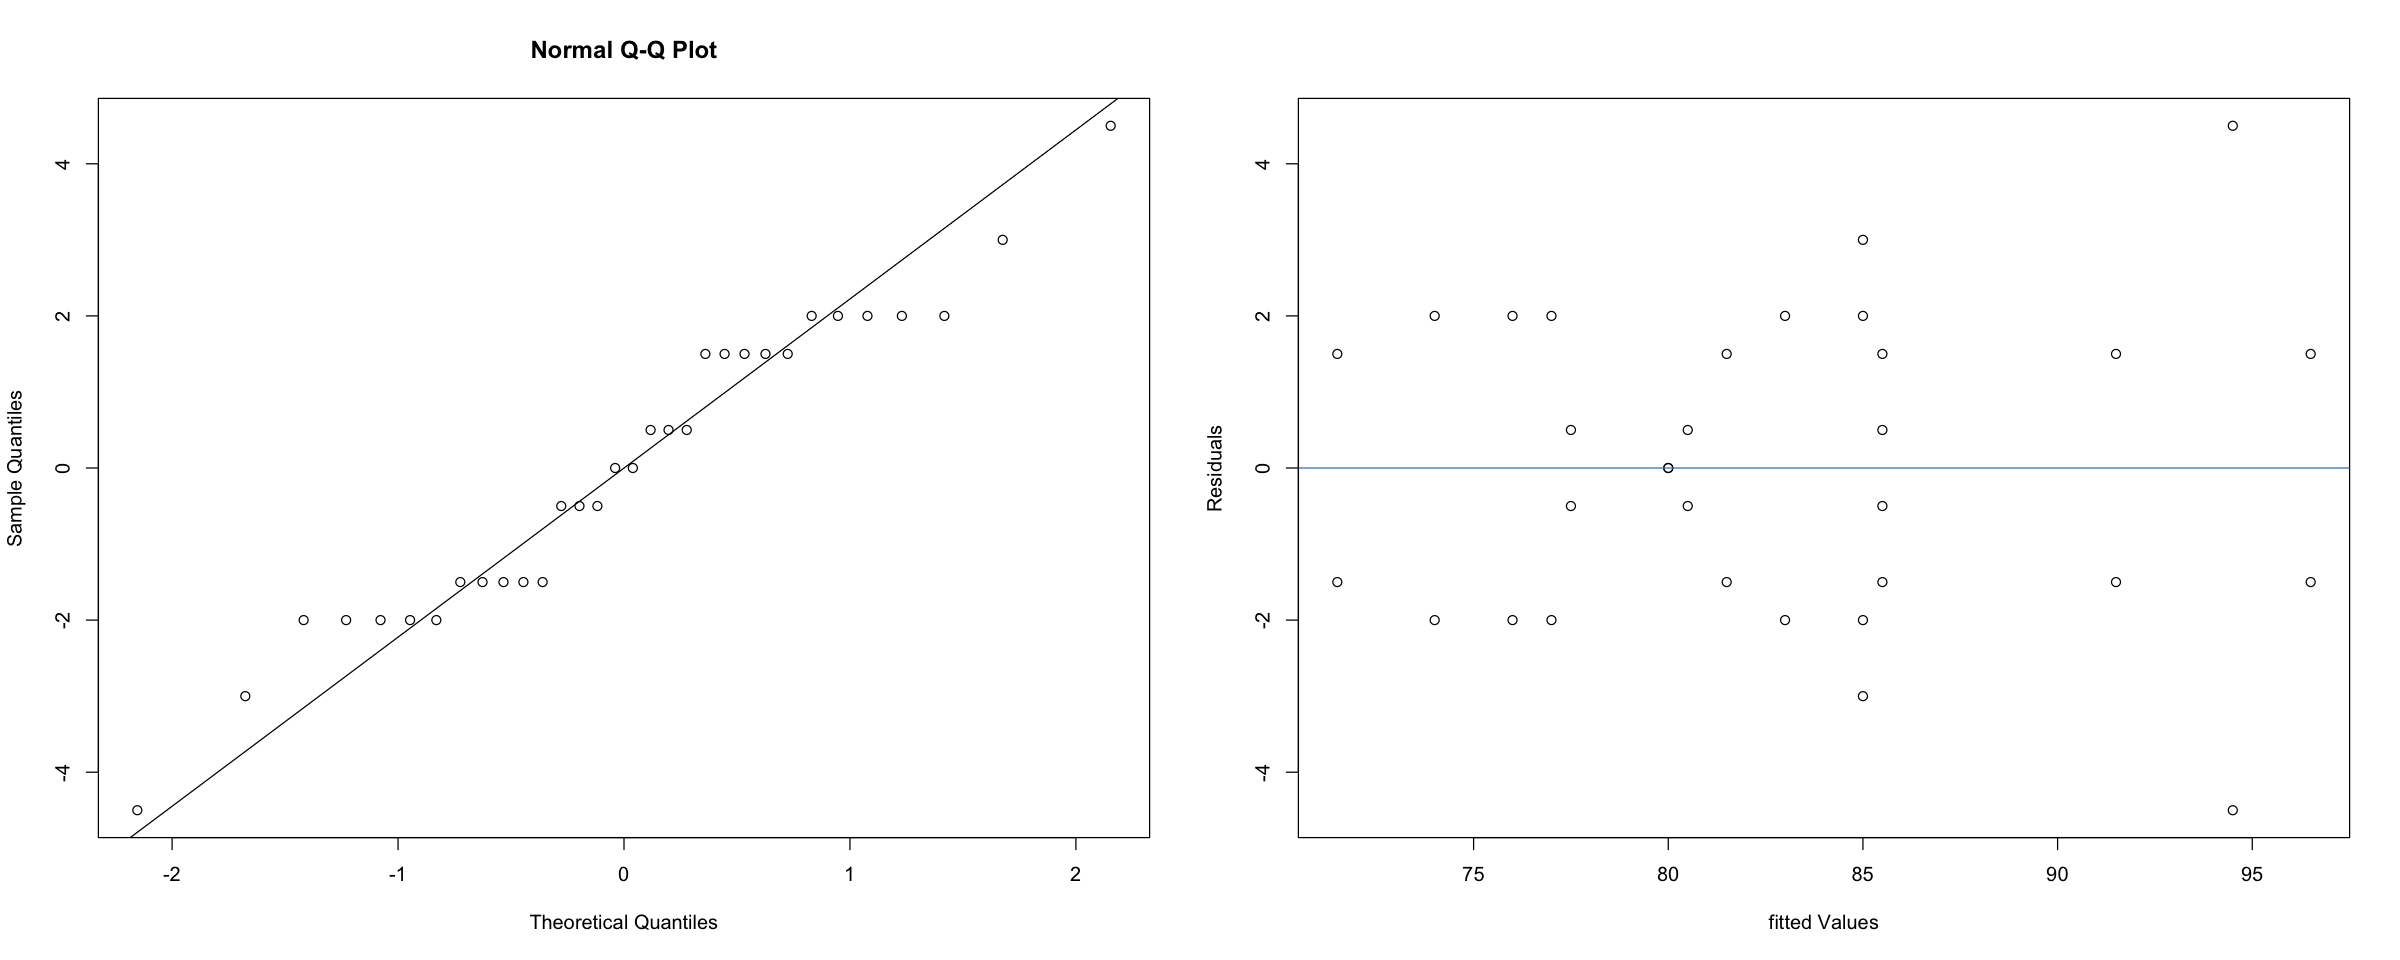

In [ ]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))
# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue")  

# Shapiro-Wilk
shapiro.test(residuals(model))

There is nothing in the graphs that suggests the residual analysis would be unsatisfactory.

# Question 3

The effect estimates form a $2^4$ factorial experiment are listed here.

In [ ]:
data <- as.matrix(c(-2.5251,   4.4054, -0.4932,  -5.0842,
           -5.7696,  5.6707, -4.6620,  -0.7982,
           -1.6564,  1.1109, -10.5229, -6.0275,
           -8.2045, -6.5304, -0.7914))
row.names(data) <- c("ABCD", "BCD", "ACD", "ABD", "ABC",
                 "CD", "BD", "BC", "AD", "AC", "AB",
                 "D", "C", "B", "A")
t(data)

ABCD,BCD,ACD,ABD,ABC,CD,BD,BC,AD,AC,AB,D,C,B,A
-2.5251,4.4054,-0.4932,-5.0842,-5.7696,5.6707,-4.662,-0.7982,-1.6564,1.1109,-10.5229,-6.0275,-8.2045,-6.5304,-0.7914


**a)** Are any of the effects significant?

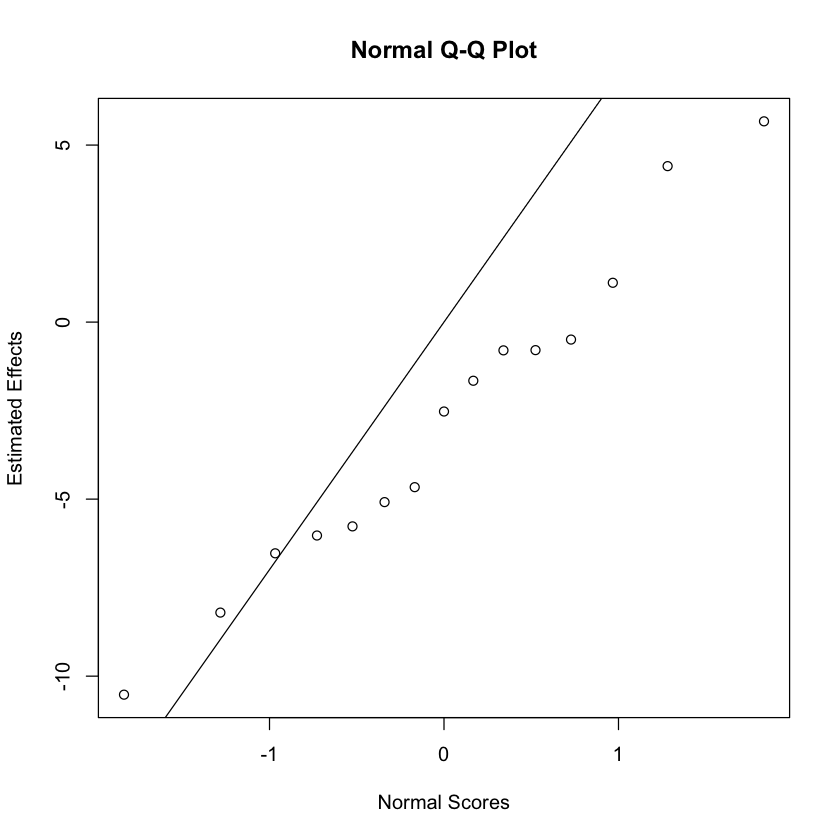

In [ ]:
library(daewr)
fullnormal(data, alpha = 0.025)

There are no labels on the graph, indicating that none of the effects are significant.

**b)** What happens if you change the effect of the interaction $AB$ to $-50.5229$ instead of $-10.5229$?

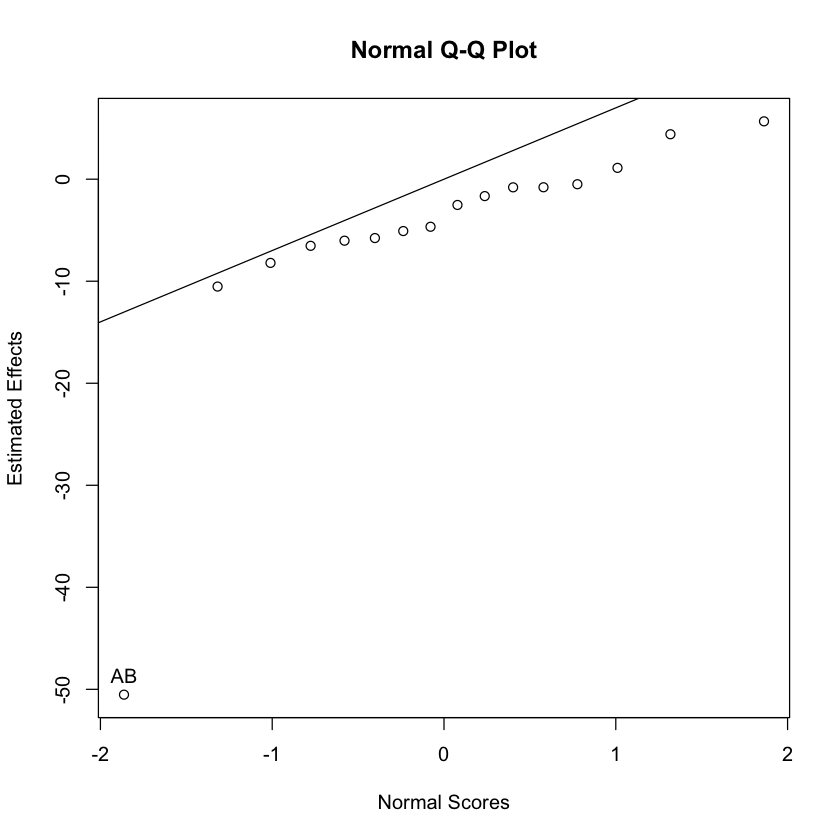

In [ ]:
data["AB"] <- -50.5229
fullnormal(data, alpha = 0.025)

Changing the effect of $AB$ to $-50.5229$ will make it significant.

# Question 4

An article in Quality and Reliability Engineering Internation presents a $2^5$ factorial design. The experiment is shown in the following table: 

In [ ]:
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1), 2)
E <- c(
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
)
y <- c(
    08.11, 05.56, 05.77, 05.82, 09.17, 07.80, 03.23, 05.69,
    08.82, 14.23, 09.20, 08.94, 08.68, 11.49, 06.25, 09.12,
    07.93, 05.00, 07.47, 12.00, 09.86, 03.65, 06.40, 11.61,
    12.43, 17.55, 08.87, 25.38, 13.06, 18.85, 11.78, 26.05
)
data <- data.frame(A, B, C, D, E, y)
t(data)

A,-1.00,1.00,-1.00,1.00,-1.00,1.0,-1.00,1.00,-1.00,1.00,...,-1.0,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00
B,-1.00,-1.00,1.00,1.00,-1.00,-1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,1.00,1.00,-1.00,-1.00,1.00,1.00
C,-1.00,-1.00,-1.00,-1.00,1.00,1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,1.00
D,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,1.00,1.00,...,-1.0,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
E,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
y,8.11,5.56,5.77,5.82,9.17,7.8,3.23,5.69,8.82,14.23,...,6.4,11.61,12.43,17.55,8.87,25.38,13.06,18.85,11.78,26.05
